In [1]:
# Import required libraries.
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Configure well plate information.

# https://labware.opentrons.com/#/?loadName=corning_12_wellplate_6.9ml_flat
well_plate_12 = {"wells"     : 12,
                 "rows"      : 3,
                 "columns"   : 4,
                 "height"    : 85.60,
                 "width"     : 127.89,
                 "x_offset"  : 24.94,
                 "y_offset"  : 16.79,
                 "x_spacing" : 26.01,
                 "y_spacing" : 26.01,
                 "diameter"  : 22.73}

# https://labware.opentrons.com/#/?loadName=corning_48_wellplate_1.6ml_flat
well_plate_48 = {"wells"     : 48,
                 "rows"      : 6,
                 "columns"   : 8,
                 "height"    : 85.60,
                 "width"     : 127.89,
                 "x_offset"  : 18.16,
                 "y_offset"  : 10.12,
                 "x_spacing" : 13.08,
                 "y_spacing" : 13.08,
                 "diameter"  : 11.56}
 
# https://labware.opentrons.com/#/?loadName=nest_96_wellplate_200ul_flat
well_plate_96 = {"wells"     : 96,
                 "rows"      : 8,
                 "columns"   : 12,
                 "height"    : 85.36,
                 "width"     : 127.56,
                 "x_offset"  : 14.28,
                 "y_offset"  : 11.18,
                 "x_spacing" : 9.00,
                 "y_spacing" : 9.00,
                 "diameter"  : 6.85}

In [3]:
def calc_well_centres(image, plate):
    """
    Calculates the x-y pixels that correspond to well centres in an image of a well plate.

    Parameters
    ----------
    image : ndarray
        The image of the well plate.
    
    plate : dict
        The measurements of the well plate.

    Returns
    -------
    (x_centres, y_centres) : tuple, ndarray
        Contains the x-y pixels that correspond to well centres in the image.
    """

    # Get the image height and width.
    image_height = image.shape[0]
    image_width = image.shape[1]

    # Calculate the scaling between the real well plate and the image.
    x_scale = image_width / plate["width"]
    y_scale = image_height / plate["height"]

    # Calculate the pixel positions that represent the centres of the wells in the image.
    x_centres = (plate["x_offset"] + (plate["x_spacing"] * np.arange(plate["columns"]))) * x_scale
    y_centres = (plate["y_offset"] + (plate["y_spacing"] * np.arange(plate["rows"]))) * y_scale

    # Return the well centres.
    return (np.round(x_centres).astype(int), np.round(y_centres).astype(int))

In [4]:
def get_colours(image, x_pixels, y_pixels):
    """
    Gets the RGB values at pixels x-y of an image. The returned array containing
    the RGB values uses the same indexing as matrices, i.e. rows x columns starting 
    top left.

    Parameters
    ----------
    image : ndarray
        The image to get the RGB values from.

    x_pixels : ndarray
        The x-pixel positions to get the RGB values from.
    
    y_pixels : ndarray
        The y-pixel positions to get the RGB values from.

    Returns
    -------
    rgb_vals : ndarray
        Contains the RGB values at pixels x-y of the image.
    """
    
    # Create a meshgrid of the x-y positions.
    xx, yy = np.meshgrid(x_pixels, y_pixels)

    # Initialise a list to store the RGB values.
    rgb_vals = []

    # Loop through the x-y positions and get the RGB values at each position.
    for x, y in zip(xx, yy):
        rgb_vals.append(image[y, x])
    
    # Return the RGB values as a numpy array.
    return np.asarray(rgb_vals)

In [5]:
def draw_grid(image, x_pixels, y_pixels, grid_colour=(0, 0, 0)):
    """
    Draws a grid at pixels x-y of an image.

    Paramters
    ---------
    image : ndarray
        The image to draw the grid on.
    
    x_pixels : ndarray
        The x-pixel positions to draw the vertical grid lines at.
    
    y_pixels : ndarray
        The y-pixel positions to draw the horizontal grid lines at.
    
    grid_colour : tuple - (R, G, B)
        The colour of the grid lines in RGB. The default is black (0, 0, 0).
    """
    
    # Get the image height and width.
    image_height = image.shape[0]
    image_width = image.shape[1]

    # Draw the vertical grid lines.
    for x in x_pixels:
        cv.line(image, (x, 0), (x, image_height), color=grid_colour)
    
    # Draw the horizontal grid lines.
    for y in y_pixels:
        cv.line(image, (0, y), (image_width, y), color=grid_colour)

[ 35  70 118]


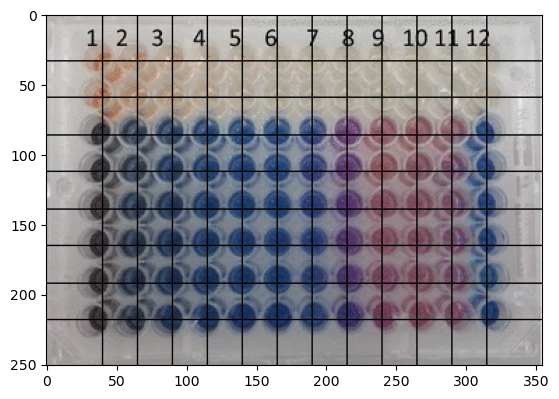

In [6]:
# Read in the image.
img = cv.cvtColor(cv.imread("wells_96_real.webp"), cv.COLOR_BGR2RGB)

# Get the well centres.
x_centres, y_centres = calc_well_centres(img, well_plate_96)

# Get the RGB values at the well centres.
colours = get_colours(img, x_centres, y_centres)

# Print RGB value of a well centre (zero indexed unlike the pictures).
print(colours[3, 5])

# Draw a grid showing the well centres.
draw_grid(img, x_centres, y_centres)

# Show the image. 
fig, ax = plt.subplots()
ax.imshow(img)